In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("advertising.csv")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


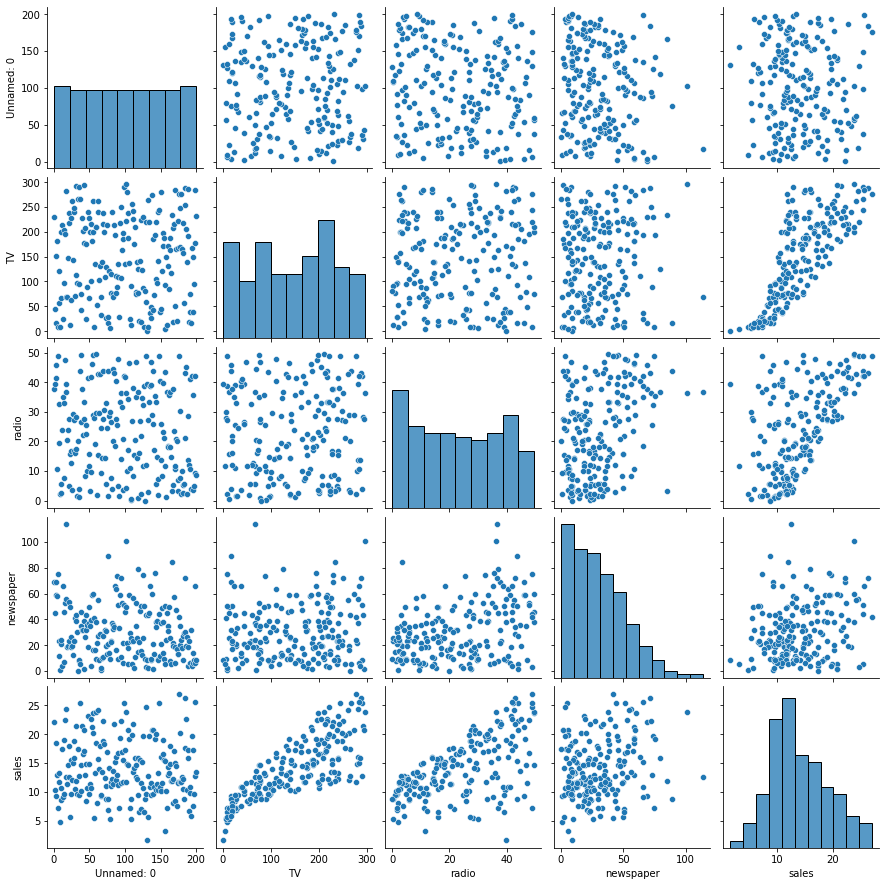

In [4]:
sns.pairplot(df)

<AxesSubplot:xlabel='sales', ylabel='Density'>

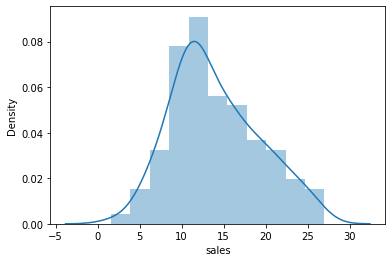

In [5]:
sns.distplot(df["sales"])

In [6]:
df.corr()

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


In [7]:
df.corr()["sales"].sort_values()

Unnamed: 0   -0.051616
newspaper     0.228299
radio         0.576223
TV            0.782224
sales         1.000000
Name: sales, dtype: float64

<AxesSubplot:>

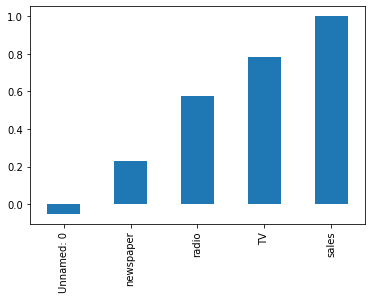

In [8]:
df.corr()["sales"].sort_values().plot(kind="bar")

In [9]:
df.corr().style.background_gradient()

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

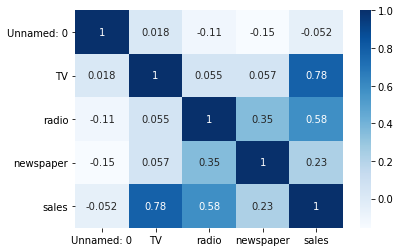

In [10]:
sns.heatmap(df.corr(), annot=True, cmap="Blues")

In [11]:
x = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values


In [12]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.25, random_state=1)

In [13]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

linreg.fit(xtrain, ytrain)

ypred = linreg.predict(xtest)

# Model Evalution

In [14]:
linreg.intercept_

2.8769666223179264

In [15]:
linreg.coef_

array([0.04656457, 0.17915812, 0.00345046])

In [16]:
x = df.iloc[:, 1:-1] 
y = df.iloc[:, -1] 


In [17]:
coef_df = pd.DataFrame(linreg.coef_, x.columns, columns=["Coefficiet"])
coef_df

,Coefficiet
TV,0.046565
radio,0.179158
newspaper,0.003450


- For every unit growth in TV, we estimate that sales will grow by  0.04   dollars
- For every unit growth in Radio, we estimate that sales will grow by  0.17   dollars
- For every unit growth in newspaper, we estimate that sales will grow by 0.00 dollars

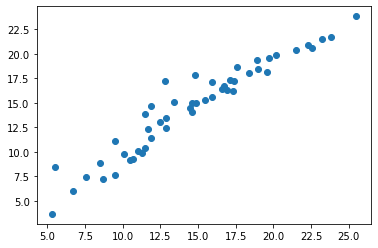

In [18]:
plt.scatter(ytest, ypred) #for best fit line

<AxesSubplot:ylabel='Density'>

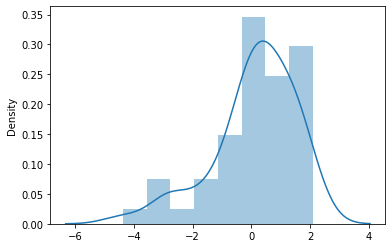

In [19]:
sns.distplot((ytest-ypred))  #error distribution

In [20]:
from sklearn.metrics import mean_squared_error as mse, r2_score

print(mse(ytest, ypred))
print(np.sqrt(mse(ytest, ypred)))
print(r2_score(ytest, ypred))

1.9730456202283377
1.4046514230328953
0.9156213613792232


In [21]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [22]:
x = df.iloc[:,1:-2]
y = df.iloc[:, -1]

xtrain, xtest, ytrain, ytest =train_test_split(x,y, test_size=0.25, random_state=1)

linreg = LinearRegression()

linreg.fit(xtrain, ytrain)

ypred = linreg.predict(xtest)

print(mse(ytest, ypred))
print(np.sqrt(mse(ytest, ypred)))
print(r2_score(ytest, ypred))

1.9262760418667433
1.387903469938289
0.9176214942248907


In [23]:
coef_df = pd.DataFrame(linreg.coef_, x.columns, columns=["Coefficiet"])
coef_df

,Coefficiet
TV,0.046602
radio,0.181180
